# End-toEnd Decel Extraction for Physionet Recordings


Note:  Should this be changed to use physionet recordings in demo_db

Caveats:  This version may have spurrious UC detections

### Select PC or Mac
usePc:
    
- True: Uses Windows Surface Pro
- False:  Uses Mac (Doug's  development Laptop)

In [1]:
usePc = False

# Imports

In [2]:
%matplotlib inline

In [3]:
import pickle
import os
from pprint import pprint
import datetime
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

from pprint import pprint
import sys

In [4]:
if usePc:
    sys.path.append('c:\Users\Dtree\Documents\GitHub\CTG\CombinedRecorder')
else:
    sys.path.append('/Users/doug/Documents/GitHub/LowCostCTG/CombinedRecorder')

In [5]:
from libPhysionet import loadPhysionetRecording, loadPhysionetMetadata, getSelectedRecordings
from display_recordings import displayCommon, summarizeUC
from libDecel import extractAllDecels, summarizeDecels
from libUC import physionetExtractUC

# Config

In [6]:
from paramsDecel import FEATURE_EXTRACT_PARAMS
from display_recordings import combinedDecelColorMap

In [7]:
#BASE_ctu_uhb_ctgdb = '/Volumes/Recordings/physionet/ctu-uhb-ctgdb'
BASE_ctu_uhb_ctgdb = '/Users/doug/Documents/ctg_recordings'

In [8]:
import warnings
warnings.filterwarnings('error')

# Code

In [9]:
def displayRecordingAll(fhr, mask, ts, uc=np.array([]), filtUC=np.array([]), allUC=[],
                        allExtractorParams={}, colorMap=combinedDecelColorMap, name='',
                        plotIncr = 25, plotOverlap = 5, showAltBaselines=False,
                        showFull=False, showDelta=False, showVariability=False, 
                        showBorderline=False, showIndividualDecels=False):

    extractorResults = extractAllDecels(fhr, mask, ts, 
                                        allUC=allUC, 
                                        allExtractorParams=FEATURE_EXTRACT_PARAMS)
    if showBorderline:
        ignore = []
    else:
        ignore = FEATURE_EXTRACT_PARAMS['allBorderline']
        
    displayCommon(extractorResults, mask, ts, uc=uc, filtUC=filtUC,
                  colorMap=colorMap, name=name, plotIncr=plotIncr, plotOverlap=plotOverlap,
                  showFull=showFull, showDelta=showDelta, showAltBaselines=showAltBaselines,
                  showVariability=showVariability, showIndividualDecels=showIndividualDecels, 
                  ignoreArtifacts=ignore)
    return

# Analysis

In [10]:
prolonged_recordings = [1001, 1003, 1004, 1017, 1018, 1019, 1028]
low_pH_recordings = [recno for recno, _ in getSelectedRecordings(mypath=BASE_ctu_uhb_ctgdb, max_pH=7.1)]

selectedRecordings = sorted(set(prolonged_recordings).union(set(low_pH_recordings)))

In [11]:
selectedRecordings = selectedRecordings[60:]
len(selectedRecordings)

8

57.98: Ignoring UC overlapping Prolonged Decel 54.50-58.95
Recording: 2023

Summary of UC and Associated Periodic Decelerations
uc @  0.53m  no decel
uc @  3.32m  no decel
uc @  5.33m  no decel
uc @  9.45m  no decel
uc @ 11.00m  no decel
uc @ 12.47m  no decel
uc @ 15.23m  no decel
skipping 17.57: pctValidFHR: 40.3%
skipping 19.20: pctValidFHR: 40.3%
uc @ 23.08m  no decel
uc @ 30.10m  no decel
uc @ 33.82m  decel @ 33.88m  lag:  4.0s  type: variable_periodic
uc @ 37.28m  no decel
uc @ 39.48m  no decel
uc @ 45.58m  no decel
uc @ 48.75m  no decel
uc @ 51.70m  no decel
uc @ 53.17m  no decel

Totals: Early: 0.0% (0)  Late: 0.0%  (0)  of total 16


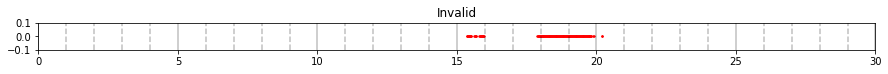

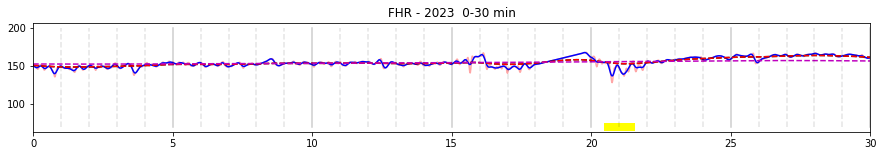

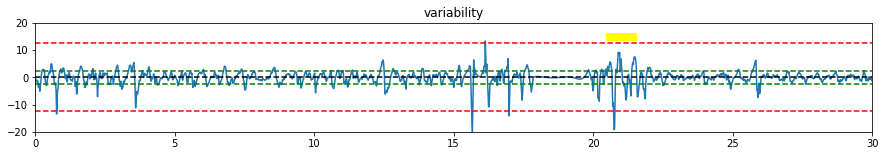

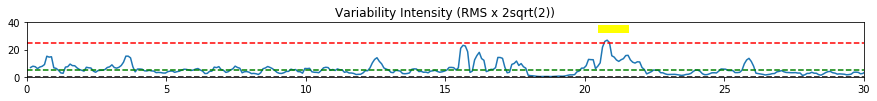

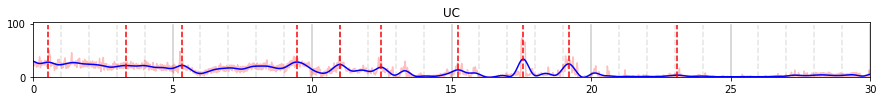

@20.75m : variable
                    26.0 bpm   dur:  19s (0.3min)   mag: 127.9 bpm   valid: 100%
                    tOnset:   9s   tRelease:  10s   span: 20.60 - 20.92 min
@21.15m : variable
                    16.3 bpm   dur:  29s (0.5min)   mag: 136.6 bpm   valid: 100%
                    tOnset:  12s   tRelease:  17s   span: 20.95 - 21.43 min

----------



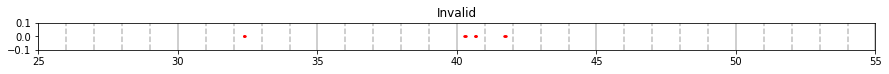

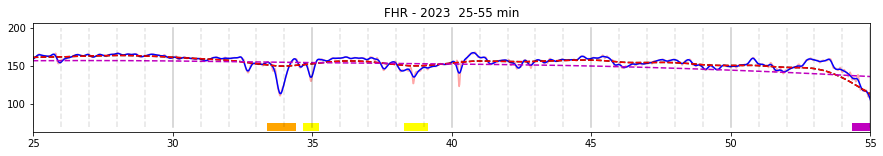

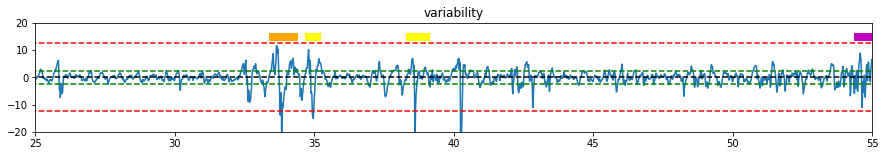

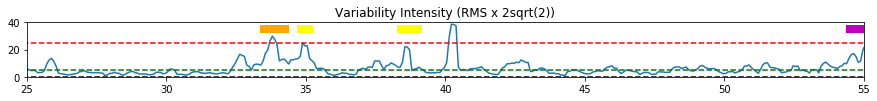

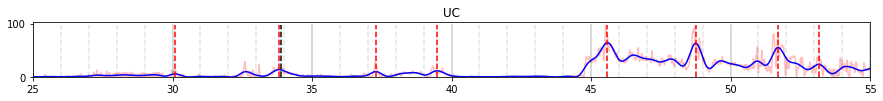

@33.88m : variable_periodic
                    32.0 bpm   dur:  45s (0.8min)   mag: 119.6 bpm   valid: 100%
                    tOnset:  22s   tRelease:  23s   span: 33.52 - 34.27 min
                    time below 70% drop: 18.0 sec
                    UC tAcme: 33.82m   lag:   4s
@34.95m : variable
                    22.9 bpm   dur:  18s (0.3min)   mag: 129.7 bpm   valid: 100%
                    tOnset:   8s   tRelease:  10s   span: 34.82 - 35.12 min
@38.65m : variable
                    23.4 bpm   dur:  36s (0.6min)   mag: 126.7 bpm   valid: 100%
                    tOnset:  14s   tRelease:  22s   span: 38.42 - 39.02 min
@56.53m : prolonged
                    62.0 bpm   dur: 267s (4.5min)   mag:  74.9 bpm   valid: 99%
                    tOnset: 122s   tRelease: 145s   span: 54.50 - 58.95 min
                    time below -15bpm: 3.8 min   time below 50% drop: 2.5 min
                    variability: 21 bpm

----------



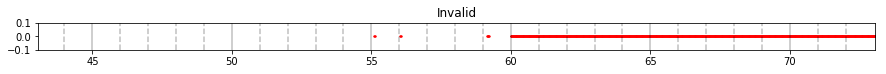

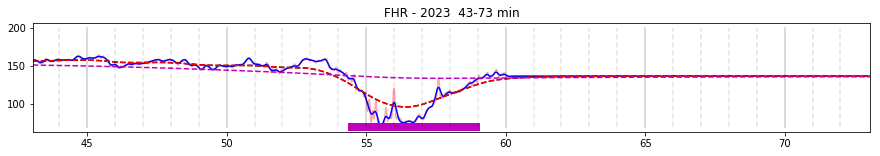

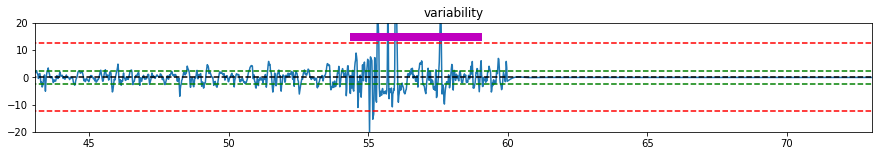

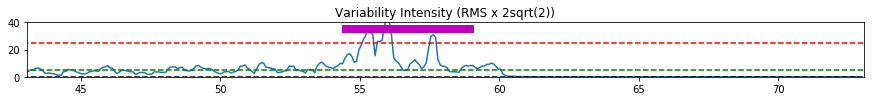

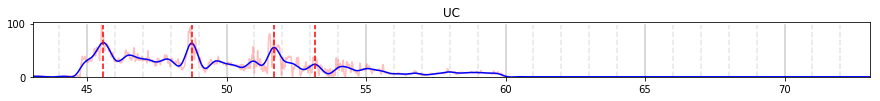

@56.53m : prolonged
                    62.0 bpm   dur: 267s (4.5min)   mag:  74.9 bpm   valid: 99%
                    tOnset: 122s   tRelease: 145s   span: 54.50 - 58.95 min
                    time below -15bpm: 3.8 min   time below 50% drop: 2.5 min
                    variability: 21 bpm

----------


****************************************


****************************************

Recording: 2024

Summary of UC and Associated Periodic Decelerations
uc @  1.23m  no decel
uc @  2.87m  no decel
uc @  5.75m  decel @  6.32m  lag: 34.0s  type: late_decel
uc @ 10.65m  decel @ 11.35m  lag: 42.0s  type: late_decel
uc @ 17.12m  decel @ 18.12m  lag: 60.0s  type: mild_late_decel
uc @ 18.77m  no decel
uc @ 20.87m  no decel
uc @ 22.53m  decel @ 23.05m  lag: 31.0s  type: variable_periodic
uc @ 24.25m  decel @ 24.95m  lag: 42.0s  type: variable_periodic
uc @ 25.98m  decel @ 26.85m  lag: 52.0s  type: late_decel
uc @ 27.72m  decel @ 28.48m  lag: 46.0s  type: late_decel
uc @ 29.38m  decel @ 30.4

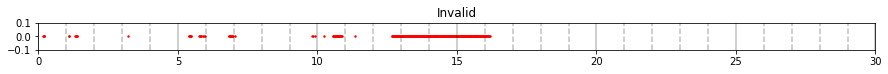

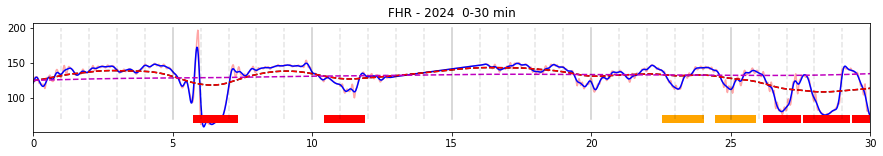

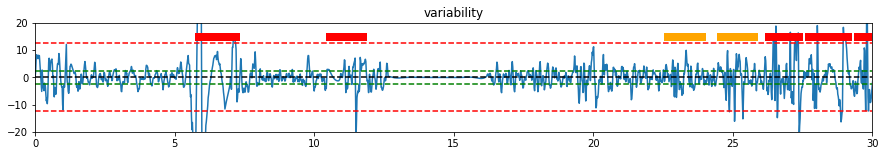

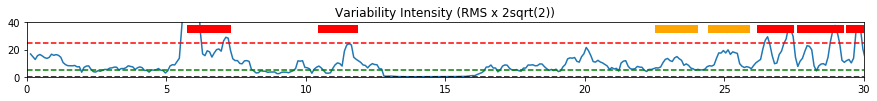

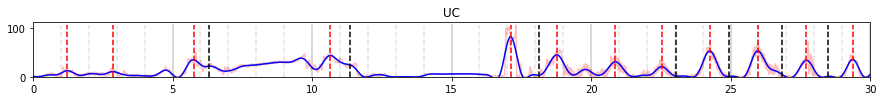

@ 6.32m : late_decel
                    76.7 bpm   dur:  79s (1.3min)   mag:  58.0 bpm   valid: 82%
                    tOnset:  27s   tRelease:  52s   span:  5.87 -  7.18 min
                    time below 70% drop: 43.0 sec
                    UC tAcme:  5.75m   lag:  34s
@11.35m : late_decel
                    18.0 bpm   dur:  70s (1.2min)   mag: 109.4 bpm   valid: 71%
                    tOnset:  47s   tRelease:  23s   span: 10.57 - 11.73 min
                    time below 70% drop: 27.0 sec
                    UC tAcme: 10.65m   lag:  42s
@23.05m : variable_periodic
                    18.3 bpm   dur:  75s (1.2min)   mag: 113.9 bpm   valid: 100%
                    tOnset:  23s   tRelease:  52s   span: 22.67 - 23.92 min
                    time below 70% drop: 21.0 sec
                    UC tAcme: 22.53m   lag:  31s
@24.95m : variable_periodic
                    19.5 bpm   dur:  72s (1.2min)   mag: 114.1 bpm   valid: 100%
                    tOnset:  23s   tRelease:  49s   spa

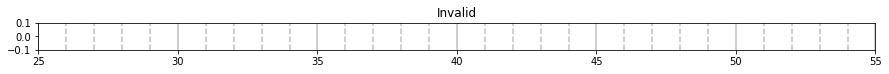

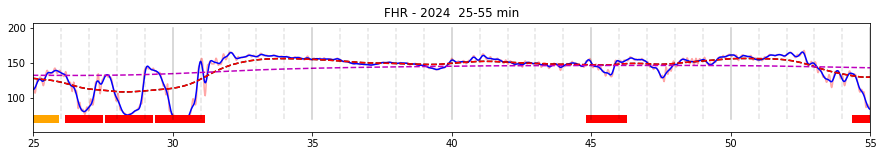

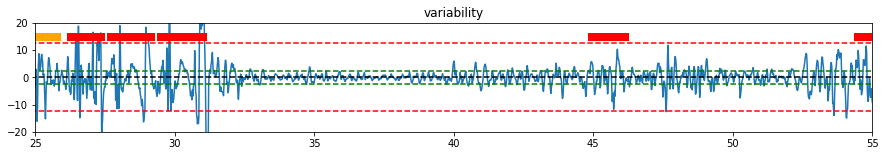

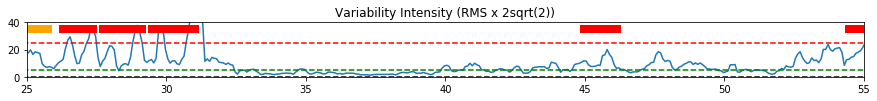

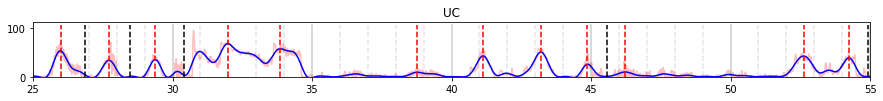

@24.95m : variable_periodic
                    19.5 bpm   dur:  72s (1.2min)   mag: 114.1 bpm   valid: 100%
                    tOnset:  23s   tRelease:  49s   span: 24.57 - 25.77 min
                    time below 70% drop: 22.0 sec
                    UC tAcme: 24.25m   lag:  42s
@26.85m : late_decel
                    42.2 bpm   dur:  64s (1.1min)   mag:  80.4 bpm   valid: 100%
                    tOnset:  33s   tRelease:  31s   span: 26.30 - 27.37 min
                    time below 70% drop: 25.0 sec
                    UC tAcme: 25.98m   lag:  52s
@28.48m : late_decel
                    52.0 bpm   dur:  84s (1.4min)   mag:  75.9 bpm   valid: 100%
                    tOnset:  45s   tRelease:  39s   span: 27.73 - 29.13 min
                    time below 70% drop: 43.0 sec
                    UC tAcme: 27.72m   lag:  46s
@30.42m : late_decel
                    65.3 bpm   dur:  91s (1.5min)   mag:  69.1 bpm   valid: 100%
                    tOnset:  55s   tRelease:  36s   span: 29

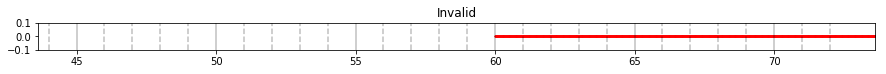

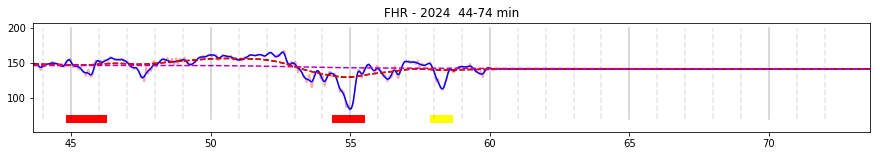

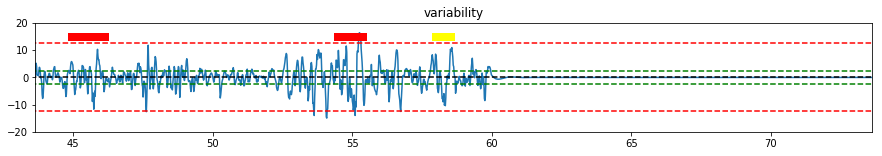

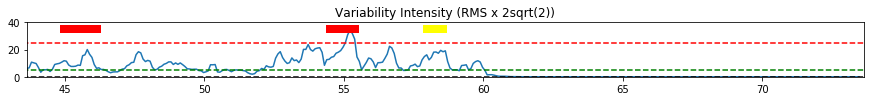

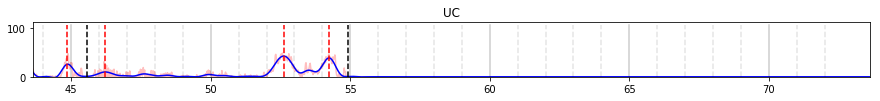

@45.58m : late_decel
                    16.4 bpm   dur:  71s (1.2min)   mag: 134.7 bpm   valid: 100%
                    tOnset:  37s   tRelease:  34s   span: 44.97 - 46.15 min
                    time below 70% drop: 23.0 sec
                    UC tAcme: 44.87m   lag:  43s
@54.93m : late_decel
                    41.7 bpm   dur:  55s (0.9min)   mag:  88.0 bpm   valid: 100%
                    tOnset:  27s   tRelease:  28s   span: 54.48 - 55.40 min
                    time below 70% drop: 20.0 sec
                    UC tAcme: 54.23m   lag:  42s
@58.30m : variable
                    28.3 bpm   dur:  33s (0.5min)   mag: 111.5 bpm   valid: 100%
                    tOnset:  19s   tRelease:  14s   span: 57.98 - 58.53 min

----------


****************************************


****************************************

** Adjacent Decels @ 34.5 and 34.7  spacing 6.0 sec
** Adjacent Decels @ 42.5 and 43.2  spacing 6.0 sec
Recording: 2025

Summary of UC and Associated Periodic Deceleration

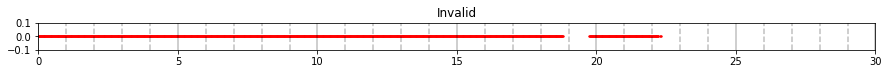

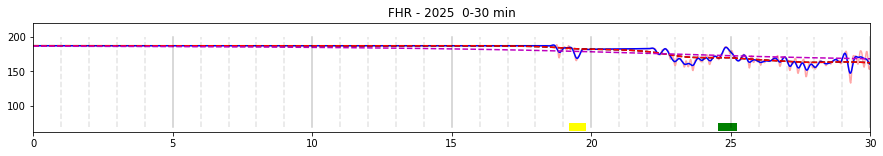

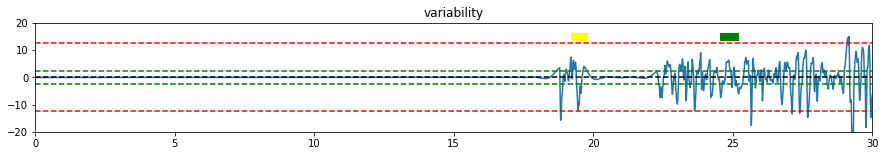

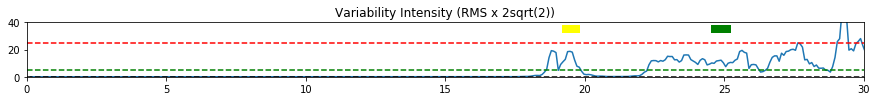

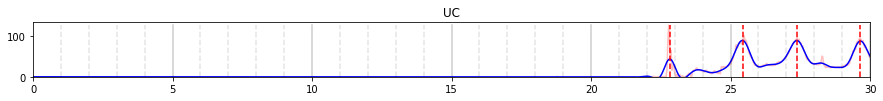

@19.50m : variable
                    17.1 bpm   dur:  21s (0.4min)   mag: 165.7 bpm   valid: 100%
                    tOnset:  10s   tRelease:  11s   span: 19.33 - 19.68 min
@24.82m : acceleration
                    15.7 bpm   dur:  24s (0.4min)   mag: 185.8 bpm   valid: 100%
                    tOnset:   8s   tRelease:  16s   span: 24.68 - 25.08 min

----------



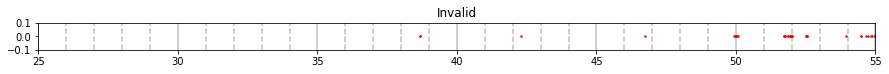

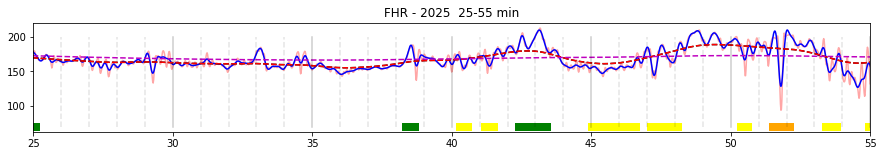

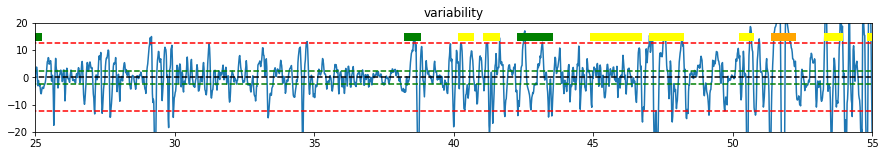

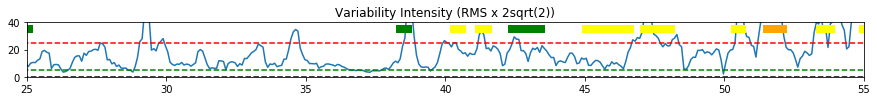

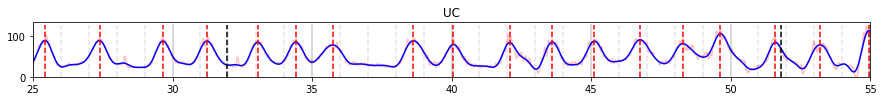

@24.82m : acceleration
                    15.7 bpm   dur:  24s (0.4min)   mag: 185.8 bpm   valid: 100%
                    tOnset:   8s   tRelease:  16s   span: 24.68 - 25.08 min
@38.60m : acceleration
                    23.6 bpm   dur:  18s (0.3min)   mag: 188.2 bpm   valid: 100%
                    tOnset:  14s   tRelease:   4s   span: 38.37 - 38.67 min
@40.43m : variable
                    16.4 bpm   dur:  18s (0.3min)   mag: 151.4 bpm   valid: 100%
                    tOnset:   8s   tRelease:  10s   span: 40.30 - 40.60 min
@41.35m : variable
                    25.2 bpm   dur:  20s (0.3min)   mag: 147.4 bpm   valid: 100%
                    tOnset:   9s   tRelease:  11s   span: 41.20 - 41.53 min
@42.53m : acceleration
                    26.4 bpm   dur:  18s (0.3min)   mag: 205.9 bpm   valid: 100%
                    tOnset:   8s   tRelease:  10s   span: 42.40 - 42.70 min
@43.17m : acceleration
                    34.4 bpm   dur:  37s (0.6min)   mag: 212.8 bpm   valid: 100%
    

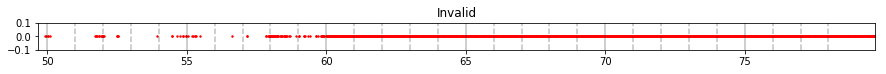

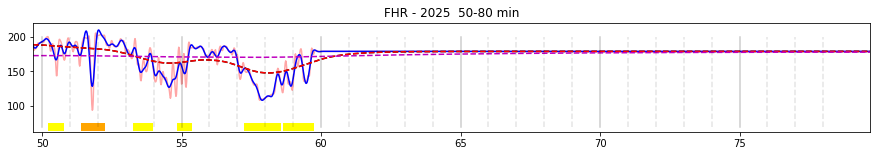

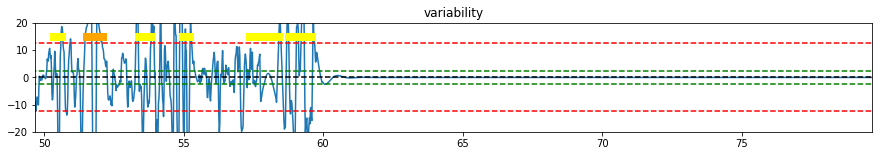

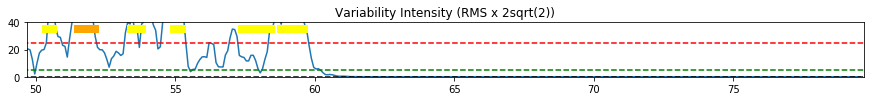

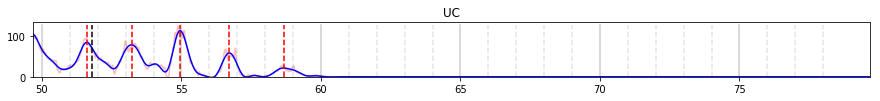

@50.50m : variable
                    42.8 bpm   dur:  16s (0.3min)   mag: 143.8 bpm   valid: 100%
                    tOnset:   8s   tRelease:   8s   span: 50.37 - 50.63 min
@51.80m : variable_periodic
                    25.9 bpm   dur:  35s (0.6min)   mag: 162.4 bpm   valid: 66%
                    tOnset:  16s   tRelease:  19s   span: 51.53 - 52.12 min
                    time below 70% drop: 12.0 sec
                    UC tAcme: 51.60m   lag:  12s
@53.55m : variable
                    32.8 bpm   dur:  24s (0.4min)   mag: 136.6 bpm   valid: 100%
                    tOnset:   8s   tRelease:  16s   span: 53.42 - 53.82 min
@55.12m : variable
                    36.9 bpm   dur:  16s (0.3min)   mag: 127.3 bpm   valid: 69%
                    tOnset:   9s   tRelease:   7s   span: 54.97 - 55.23 min
@57.90m : variable
                    39.8 bpm   dur:  63s (1.0min)   mag: 109.0 bpm   valid: 52%
                    tOnset:  31s   tRelease:  32s   span: 57.38 - 58.43 min
@58.92m : varia

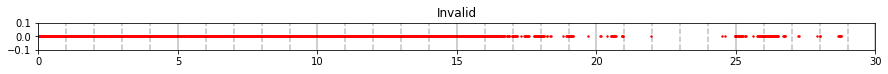

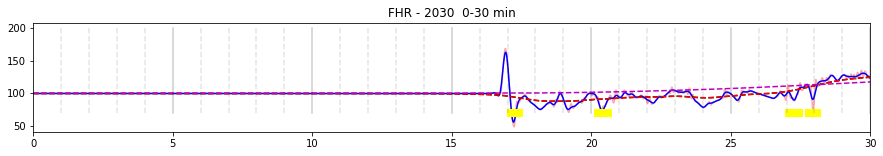

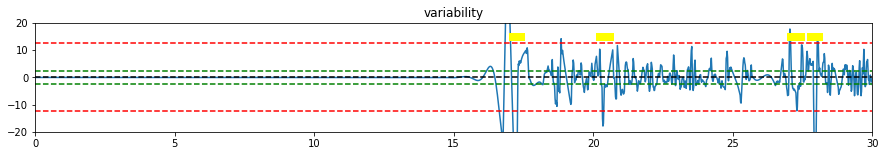

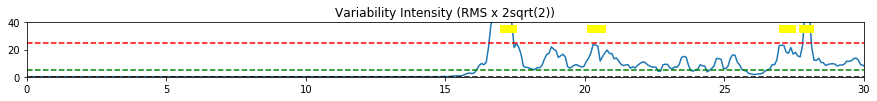

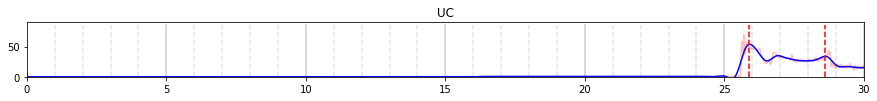

@17.22m : variable
                    45.7 bpm   dur:  18s (0.3min)   mag:  48.0 bpm   valid: 72%
                    tOnset:   6s   tRelease:  12s   span: 17.12 - 17.42 min
@20.40m : variable
                    23.3 bpm   dur:  22s (0.4min)   mag:  67.3 bpm   valid: 73%
                    tOnset:  10s   tRelease:  12s   span: 20.23 - 20.60 min
@27.27m : variable
                    16.6 bpm   dur:  20s (0.3min)   mag:  88.0 bpm   valid: 90%
                    tOnset:  10s   tRelease:  10s   span: 27.10 - 27.43 min
@27.95m : variable
                    37.9 bpm   dur:  16s (0.3min)   mag:  72.8 bpm   valid: 81%
                    tOnset:   8s   tRelease:   8s   span: 27.82 - 28.08 min

----------



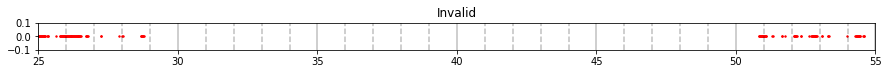

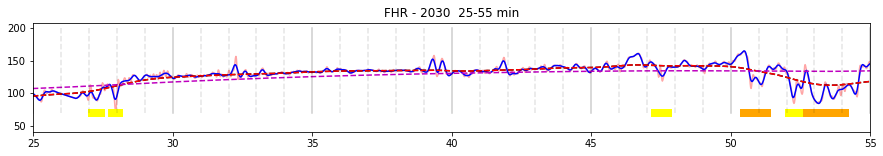

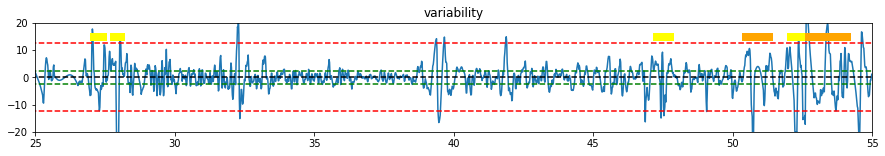

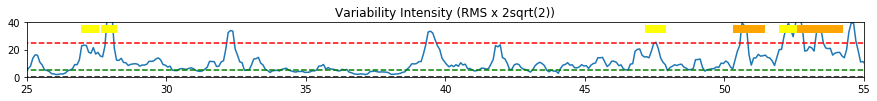

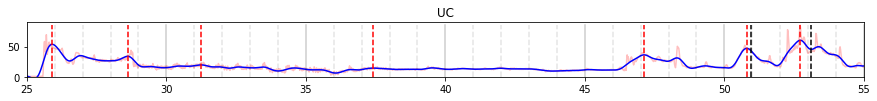

@27.27m : variable
                    16.6 bpm   dur:  20s (0.3min)   mag:  88.0 bpm   valid: 90%
                    tOnset:  10s   tRelease:  10s   span: 27.10 - 27.43 min
@27.95m : variable
                    37.9 bpm   dur:  16s (0.3min)   mag:  72.8 bpm   valid: 81%
                    tOnset:   8s   tRelease:   8s   span: 27.82 - 28.08 min
@47.55m : variable
                    23.4 bpm   dur:  28s (0.5min)   mag: 118.4 bpm   valid: 100%
                    tOnset:  15s   tRelease:  13s   span: 47.30 - 47.77 min
@50.97m : variable_periodic
                    17.1 bpm   dur:  50s (0.8min)   mag: 115.4 bpm   valid: 66%
                    tOnset:  30s   tRelease:  20s   span: 50.47 - 51.30 min
                    time below 70% drop: 18.0 sec
                    UC tAcme: 50.80m   lag:  10s
@52.25m : variable
                    36.9 bpm   dur:  34s (0.6min)   mag:  84.1 bpm   valid: 74%
                    tOnset:   9s   tRelease:  25s   span: 52.10 - 52.67 min
@53.10m : variab

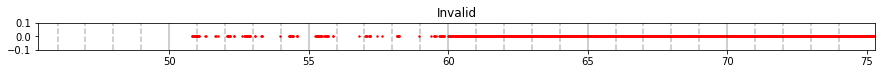

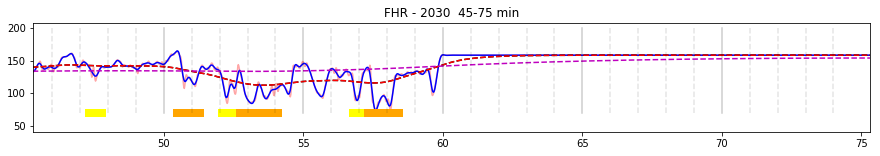

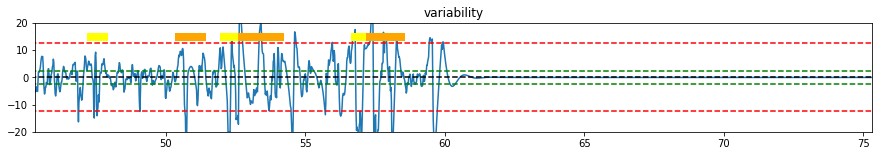

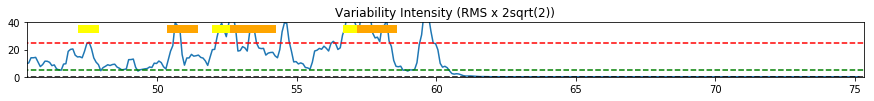

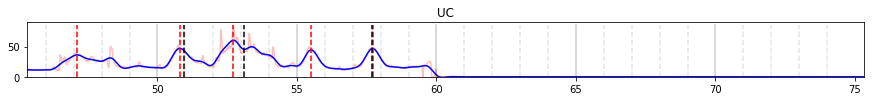

@47.55m : variable
                    23.4 bpm   dur:  28s (0.5min)   mag: 118.4 bpm   valid: 100%
                    tOnset:  15s   tRelease:  13s   span: 47.30 - 47.77 min
@50.97m : variable_periodic
                    17.1 bpm   dur:  50s (0.8min)   mag: 115.4 bpm   valid: 66%
                    tOnset:  30s   tRelease:  20s   span: 50.47 - 51.30 min
                    time below 70% drop: 18.0 sec
                    UC tAcme: 50.80m   lag:  10s
@52.25m : variable
                    36.9 bpm   dur:  34s (0.6min)   mag:  84.1 bpm   valid: 74%
                    tOnset:   9s   tRelease:  25s   span: 52.10 - 52.67 min
@53.10m : variable_periodic
                    24.8 bpm   dur:  82s (1.4min)   mag:  85.9 bpm   valid: 79%
                    tOnset:  22s   tRelease:  60s   span: 52.73 - 54.10 min
                    time below 70% drop: 15.0 sec
                    UC tAcme: 52.72m   lag:  23s
@56.93m : variable
                    28.9 bpm   dur:  18s (0.3min)   mag:  88.4 b

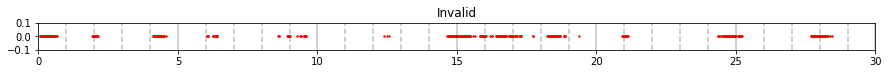

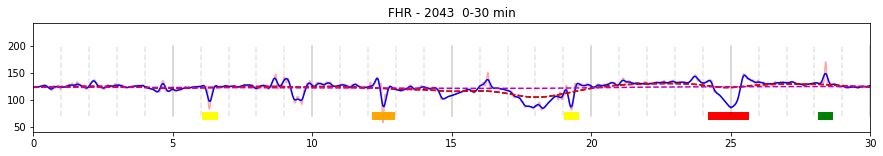

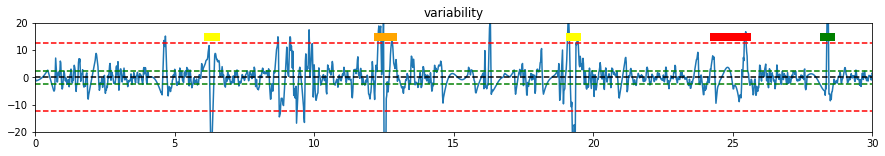

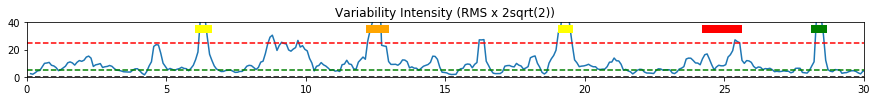

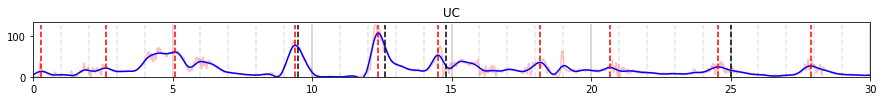

@ 6.33m : variable
                    39.7 bpm   dur:  18s (0.3min)   mag:  82.8 bpm   valid: 50%
                    tOnset:   9s   tRelease:   9s   span:  6.18 -  6.48 min
@12.60m : variable_periodic
                    15.0 bpm   dur:  33s (0.6min)   mag: 103.4 bpm   valid: 91%
                    tOnset:  19s   tRelease:  14s   span: 12.28 - 12.83 min
                    time below 70% drop: 11.0 sec
                    UC tAcme: 12.37m   lag:  14s
@19.28m : variable
                    32.8 bpm   dur:  15s (0.2min)   mag:  81.1 bpm   valid: 93%
                    tOnset:   7s   tRelease:   8s   span: 19.17 - 19.42 min
@25.02m : late_decel
                    41.8 bpm   dur:  70s (1.2min)   mag:  85.3 bpm   valid: 39%
                    tOnset:  41s   tRelease:  29s   span: 24.33 - 25.50 min
                    time below 70% drop: 25.0 sec
                    UC tAcme: 24.57m   lag:  27s
@28.40m : acceleration
                    42.4 bpm   dur:  16s (0.3min)   mag: 170.4 bpm  

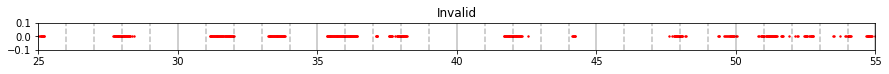

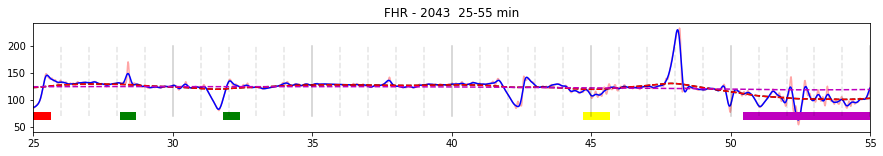

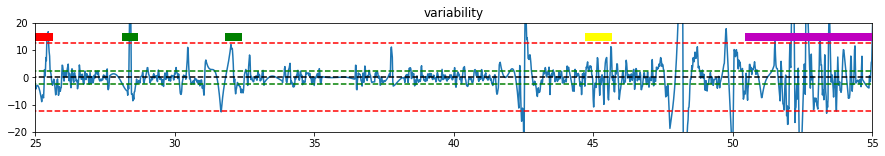

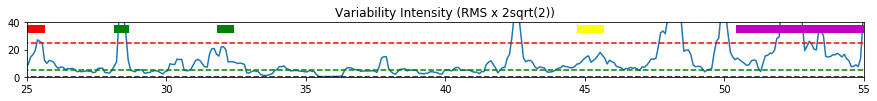

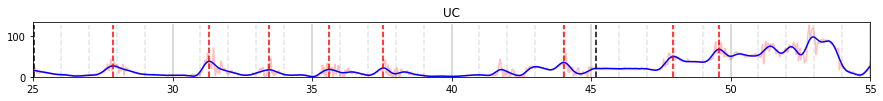

@25.02m : late_decel
                    41.8 bpm   dur:  70s (1.2min)   mag:  85.3 bpm   valid: 39%
                    tOnset:  41s   tRelease:  29s   span: 24.33 - 25.50 min
                    time below 70% drop: 25.0 sec
                    UC tAcme: 24.57m   lag:  27s
@28.40m : acceleration
                    42.4 bpm   dur:  16s (0.3min)   mag: 170.4 bpm   valid: 75%
                    tOnset:   8s   tRelease:   8s   span: 28.27 - 28.53 min
@32.05m : acceleration
                    17.1 bpm   dur:  20s (0.3min)   mag: 138.0 bpm   valid: 80%
                    tOnset:   6s   tRelease:  14s   span: 31.95 - 32.28 min
@45.03m : variable
                    16.6 bpm   dur:  41s (0.7min)   mag: 102.6 bpm   valid: 100%
                    tOnset:  11s   tRelease:  30s   span: 44.85 - 45.53 min
@52.40m : prolonged
                    31.6 bpm   dur: 381s (6.3min)   mag:  87.5 bpm   valid: 75%
                    tOnset: 110s   tRelease: 271s   span: 50.57 - 56.92 min
              

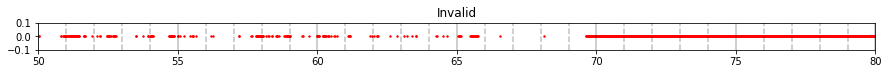

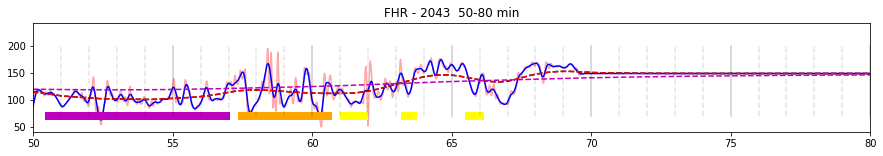

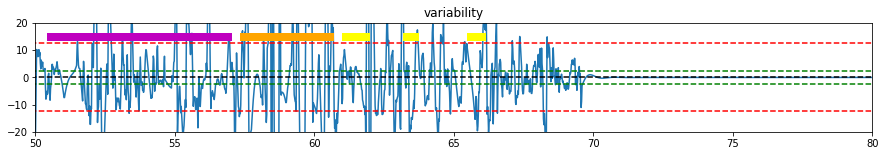

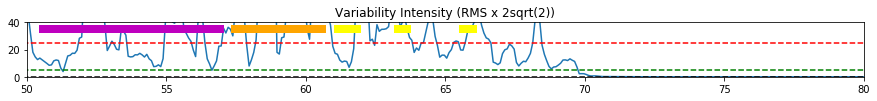

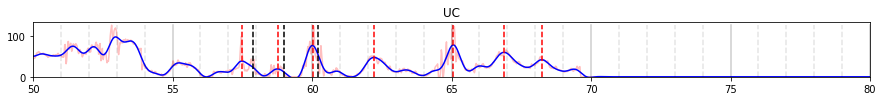

@52.40m : prolonged
                    31.6 bpm   dur: 381s (6.3min)   mag:  87.5 bpm   valid: 75%
                    tOnset: 110s   tRelease: 271s   span: 50.57 - 56.92 min
                    time below -15bpm: 3.6 min   time below 50% drop: 3.4 min
                    variability: 39 bpm
@57.88m : variable_periodic
                    63.5 bpm   dur:  53s (0.9min)   mag:  79.5 bpm   valid: 58%
                    tOnset:  25s   tRelease:  28s   span: 57.47 - 58.35 min
                    time below 70% drop: 20.0 sec
                    UC tAcme: 57.48m   lag:  24s
@59.00m : variable_periodic
                    39.7 bpm   dur:  79s (1.3min)   mag:  98.4 bpm   valid: 76%
                    tOnset:  34s   tRelease:  45s   span: 58.43 - 59.75 min
                    time below 70% drop: 43.0 sec
                    UC tAcme: 58.77m   lag:  14s
@60.22m : variable_periodic
                    49.9 bpm   dur:  44s (0.7min)   mag:  75.4 bpm   valid: 59%
                    tOnset:  23s

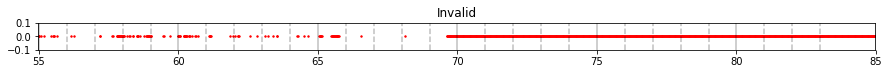

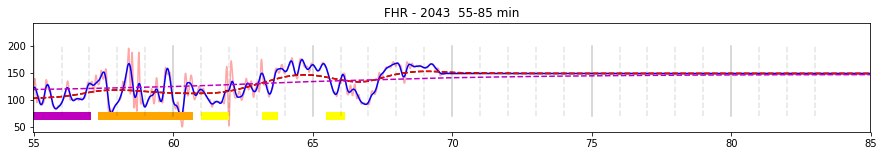

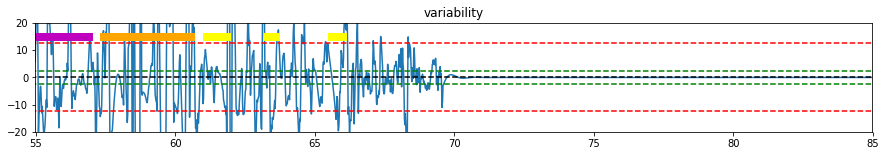

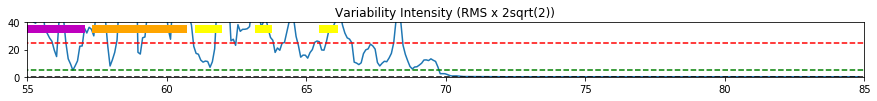

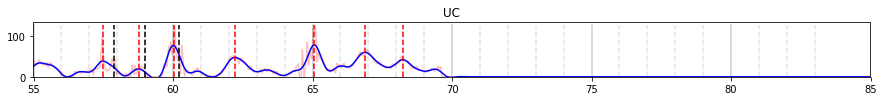

@52.40m : prolonged
                    31.6 bpm   dur: 381s (6.3min)   mag:  87.5 bpm   valid: 75%
                    tOnset: 110s   tRelease: 271s   span: 50.57 - 56.92 min
                    time below -15bpm: 3.6 min   time below 50% drop: 3.4 min
                    variability: 39 bpm
@57.88m : variable_periodic
                    63.5 bpm   dur:  53s (0.9min)   mag:  79.5 bpm   valid: 58%
                    tOnset:  25s   tRelease:  28s   span: 57.47 - 58.35 min
                    time below 70% drop: 20.0 sec
                    UC tAcme: 57.48m   lag:  24s
@59.00m : variable_periodic
                    39.7 bpm   dur:  79s (1.3min)   mag:  98.4 bpm   valid: 76%
                    tOnset:  34s   tRelease:  45s   span: 58.43 - 59.75 min
                    time below 70% drop: 43.0 sec
                    UC tAcme: 58.77m   lag:  14s
@60.22m : variable_periodic
                    49.9 bpm   dur:  44s (0.7min)   mag:  75.4 bpm   valid: 59%
                    tOnset:  23s

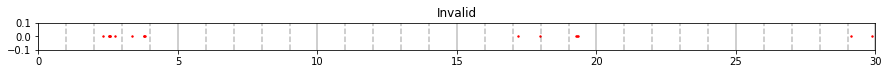

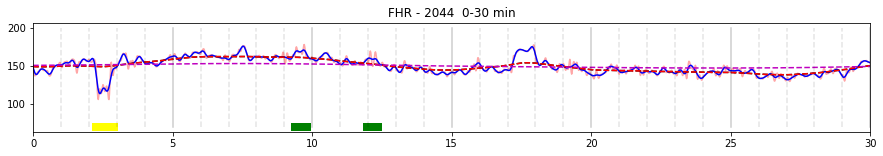

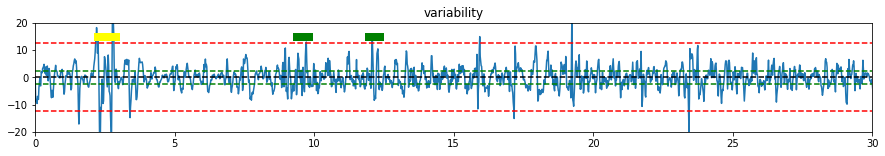

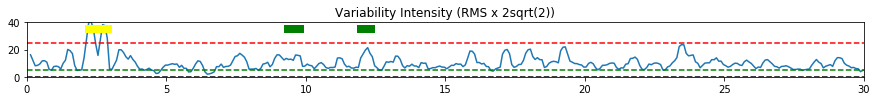

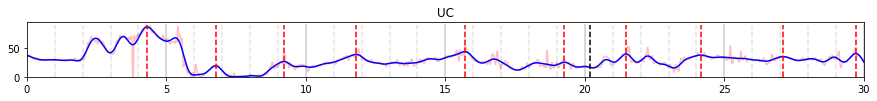

@ 2.38m : variable
                    43.2 bpm   dur:  40s (0.7min)   mag: 106.0 bpm   valid: 85%
                    tOnset:   9s   tRelease:  31s   span:  2.23 -  2.90 min
@ 9.72m : acceleration
                    17.2 bpm   dur:  26s (0.4min)   mag: 178.3 bpm   valid: 100%
                    tOnset:  21s   tRelease:   5s   span:  9.37 -  9.80 min
@12.08m : acceleration
                    16.7 bpm   dur:  23s (0.4min)   mag: 169.7 bpm   valid: 100%
                    tOnset:   7s   tRelease:  16s   span: 11.97 - 12.35 min

----------



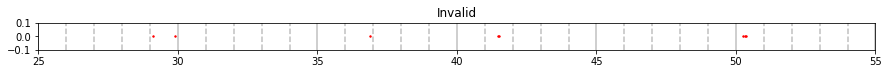

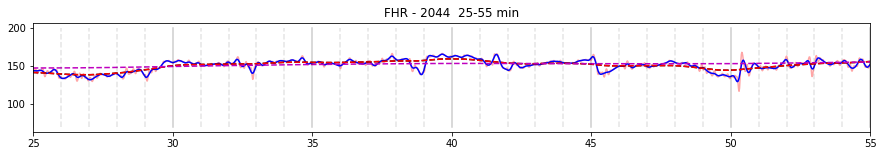

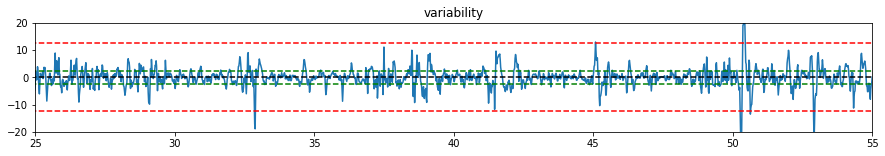

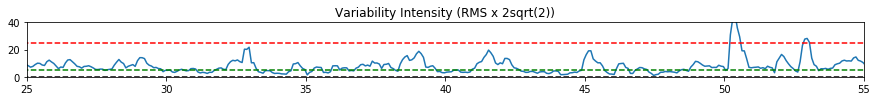

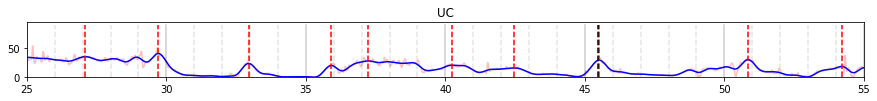


----------



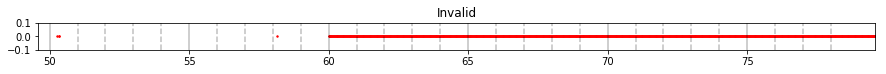

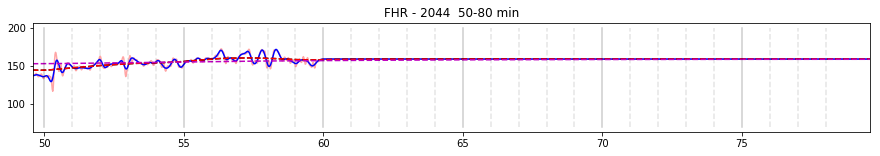

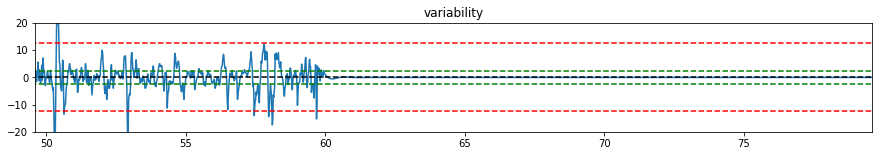

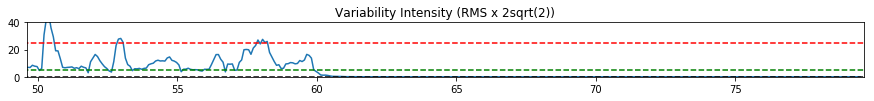

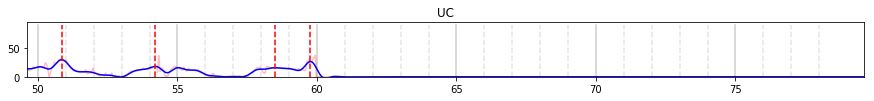


----------


****************************************


****************************************

54.60: Ignoring UC overlapping Prolonged Decel 51.98-59.30
56.97: Ignoring UC overlapping Prolonged Decel 51.98-59.30
Recording: 2045

Summary of UC and Associated Periodic Decelerations
uc @  0.27m  decel @  1.12m  lag: 51.0s  type: mild_late_decel
uc @  2.07m  no decel
uc @  3.67m  no decel
uc @  5.55m  no decel
uc @  8.57m  decel @  8.73m  lag: 10.0s  type: variable_periodic
skipping 10.53: pctValidFHR: 40.3%
skipping 16.27: pctValidFHR: 0.0%
uc @ 19.98m  decel @ 20.18m  lag: 12.0s  type: shallow_early_decel
uc @ 23.48m  no decel
uc @ 26.30m  no decel
uc @ 28.35m  no decel
uc @ 30.03m  no decel
uc @ 31.92m  no decel
uc @ 33.32m  no decel
uc @ 35.93m  no decel
uc @ 38.47m  no decel
uc @ 40.82m  no decel
uc @ 42.65m  no decel
uc @ 46.28m  no decel
uc @ 49.07m  no decel
uc @ 51.78m  decel @ 52.78m  lag: 60.0s  type: late_decel

Totals: Early: 5.3% (1)  Late: 10.5%  (2)  of total 19


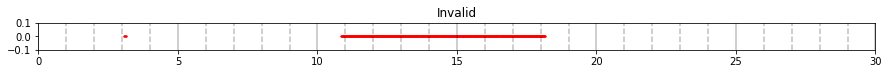

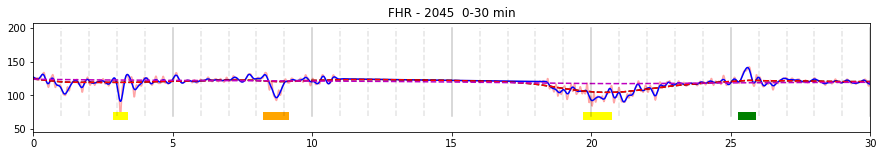

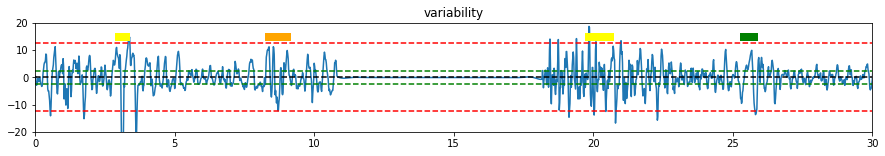

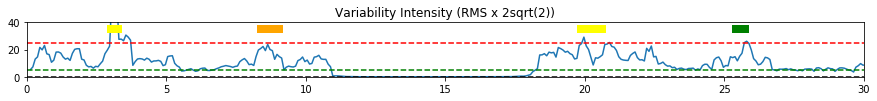

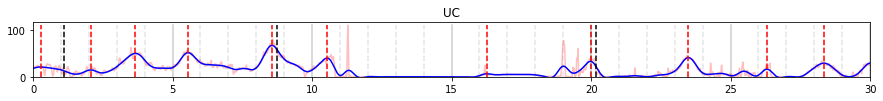

@ 3.13m : variable
                    49.6 bpm   dur:  16s (0.3min)   mag:  69.6 bpm   valid: 81%
                    tOnset:   8s   tRelease:   8s   span:  3.00 -  3.27 min
@ 8.73m : variable_periodic
                    18.0 bpm   dur:  39s (0.7min)   mag:  99.9 bpm   valid: 100%
                    tOnset:  21s   tRelease:  18s   span:  8.38 -  9.03 min
                    time below 70% drop: 15.0 sec
                    UC tAcme:  8.57m   lag:  10s
@20.03m : variable
                    21.2 bpm   dur:  45s (0.8min)   mag:  84.2 bpm   valid: 100%
                    tOnset:  10s   tRelease:  35s   span: 19.87 - 20.62 min
@25.67m : acceleration
                    20.1 bpm   dur:  20s (0.3min)   mag: 142.5 bpm   valid: 100%
                    tOnset:  15s   tRelease:   5s   span: 25.42 - 25.75 min

----------



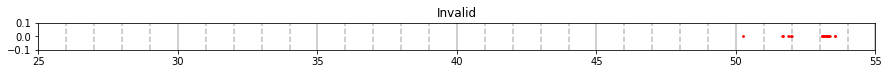

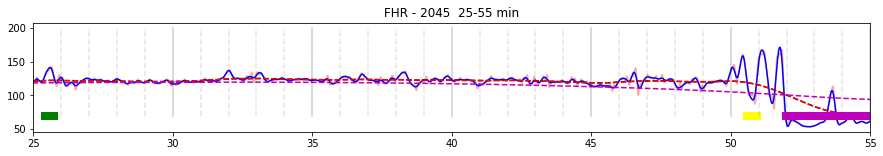

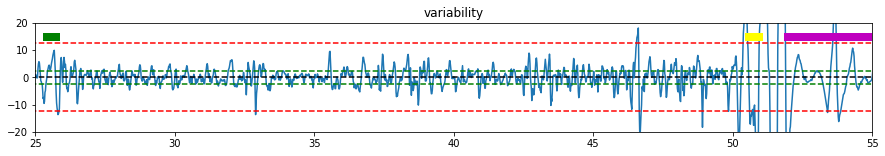

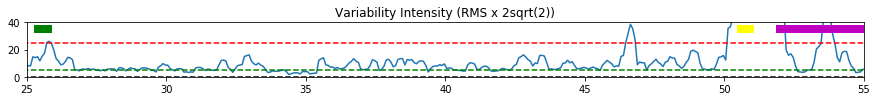

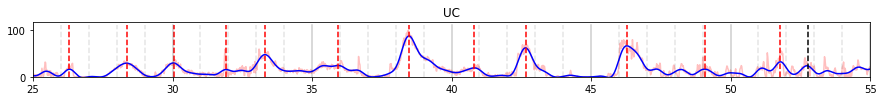

@25.67m : acceleration
                    20.1 bpm   dur:  20s (0.3min)   mag: 142.5 bpm   valid: 100%
                    tOnset:  15s   tRelease:   5s   span: 25.42 - 25.75 min
@50.80m : variable
                    29.7 bpm   dur:  20s (0.3min)   mag:  87.2 bpm   valid: 100%
                    tOnset:  12s   tRelease:   8s   span: 50.60 - 50.93 min
@53.00m : prolonged
                    48.0 bpm   dur: 439s (7.3min)   mag:  52.6 bpm   valid: 94%
                    tOnset:  61s   tRelease: 378s   span: 51.98 - 59.30 min
                    time below -15bpm: 6.5 min   time below 50% drop: 5.3 min
                    variability: 6 bpm

----------



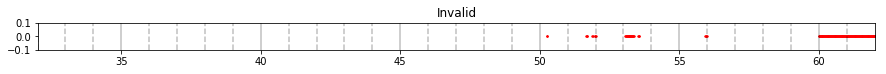

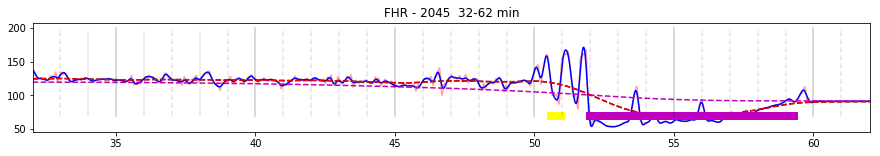

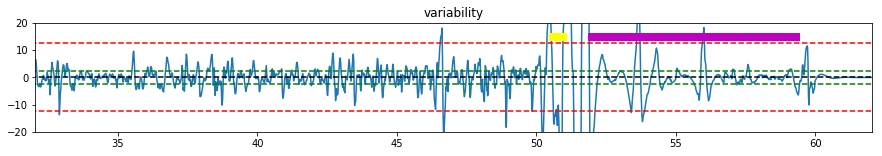

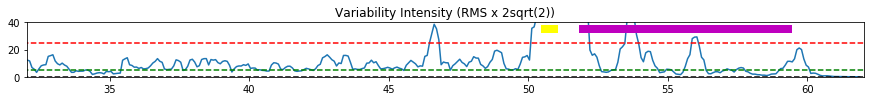

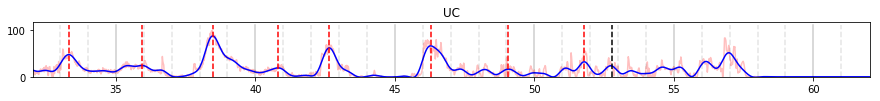

@50.80m : variable
                    29.7 bpm   dur:  20s (0.3min)   mag:  87.2 bpm   valid: 100%
                    tOnset:  12s   tRelease:   8s   span: 50.60 - 50.93 min
@53.00m : prolonged
                    48.0 bpm   dur: 439s (7.3min)   mag:  52.6 bpm   valid: 94%
                    tOnset:  61s   tRelease: 378s   span: 51.98 - 59.30 min
                    time below -15bpm: 6.5 min   time below 50% drop: 5.3 min
                    variability: 6 bpm

----------


****************************************


****************************************

** Adjacent Decels @ 22.1 and 22.7  spacing 10.0 sec
Recording: 2046

Summary of UC and Associated Periodic Decelerations
uc @  1.05m  decel @  1.22m  lag: 10.0s  type: shallow_early_decel
uc @  3.02m  decel @  3.17m  lag:  9.0s  type: shallow_early_decel
uc @  4.75m  decel @  5.00m  lag: 15.0s  type: early_decel
uc @  6.77m  no decel
uc @  8.40m  no decel
skipping 12.42: pctValidFHR: 47.9%
uc @ 17.62m  decel @ 18.05m  lag: 26.0

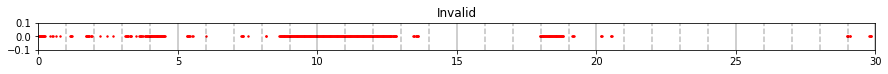

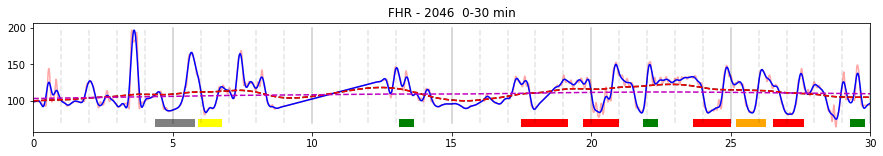

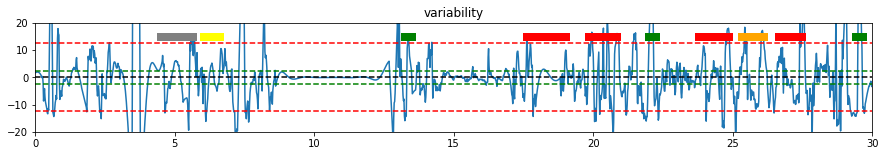

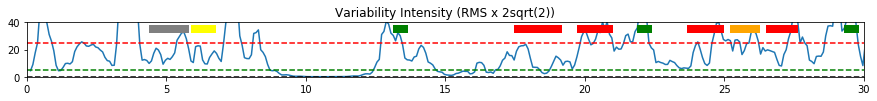

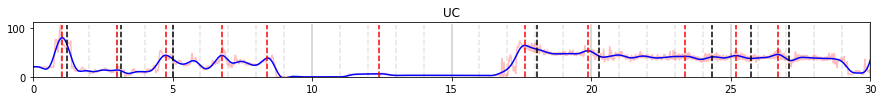

@ 5.00m : early_decel
                    22.8 bpm   dur:  69s (1.2min)   mag:  85.8 bpm   valid: 84%
                    tOnset:  29s   tRelease:  40s   span:  4.52 -  5.67 min
                    time below 70% drop: 30.0 sec
                    UC tAcme:  4.75m   lag:  15s
@ 6.18m : variable
                    31.4 bpm   dur:  36s (0.6min)   mag:  80.9 bpm   valid: 100%
                    tOnset:   9s   tRelease:  27s   span:  6.03 -  6.63 min
@13.37m : acceleration
                    26.4 bpm   dur:  15s (0.2min)   mag: 141.1 bpm   valid: 80%
                    tOnset:   6s   tRelease:   9s   span: 13.27 - 13.52 min
@18.05m : late_decel
                    34.3 bpm   dur:  85s (1.4min)   mag:  91.1 bpm   valid: 40%
                    tOnset:  26s   tRelease:  59s   span: 17.62 - 19.03 min
                    time below 70% drop: 26.0 sec
                    UC tAcme: 17.62m   lag:  26s
@20.28m : late_decel
                    40.3 bpm   dur:  61s (1.0min)   mag:  85.0 bpm   va

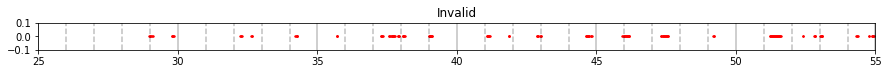

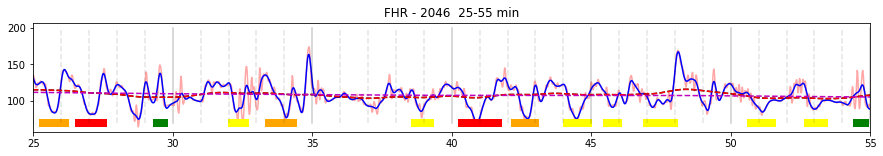

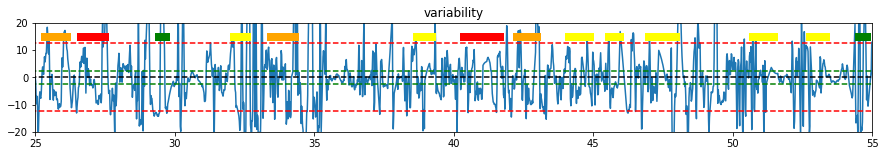

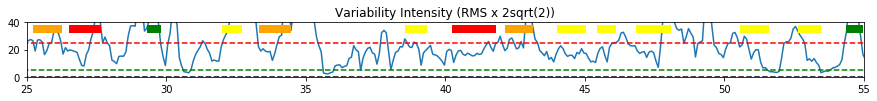

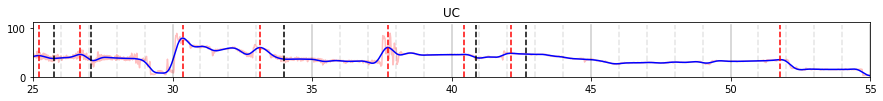

@25.73m : variable_periodic
                    37.1 bpm   dur:  47s (0.8min)   mag:  84.1 bpm   valid: 100%
                    tOnset:  23s   tRelease:  24s   span: 25.35 - 26.13 min
                    time below 70% drop: 17.0 sec
                    UC tAcme: 25.20m   lag:  32s
@27.08m : late_decel
                    37.9 bpm   dur:  51s (0.9min)   mag:  78.5 bpm   valid: 100%
                    tOnset:  26s   tRelease:  25s   span: 26.65 - 27.50 min
                    time below 70% drop: 19.0 sec
                    UC tAcme: 26.68m   lag:  24s
@29.53m : acceleration
                    44.2 bpm   dur:  15s (0.2min)   mag: 149.2 bpm   valid: 100%
                    tOnset:   6s   tRelease:   9s   span: 29.43 - 29.68 min
@32.28m : variable
                    36.9 bpm   dur:  27s (0.5min)   mag:  73.6 bpm   valid: 85%
                    tOnset:   9s   tRelease:  18s   span: 32.13 - 32.58 min
@34.00m : variable_periodic
                    18.8 bpm   dur:  52s (0.9min)   mag:

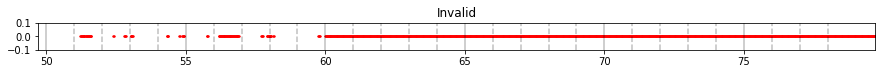

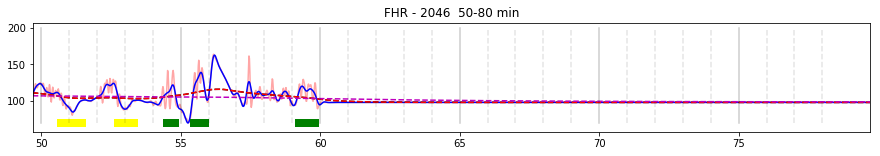

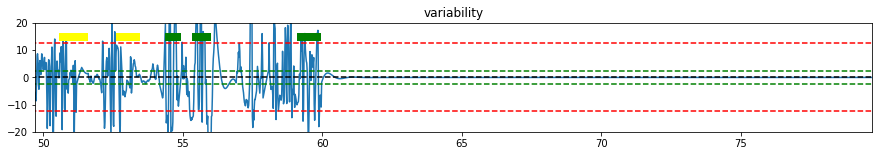

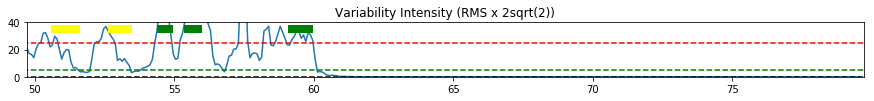

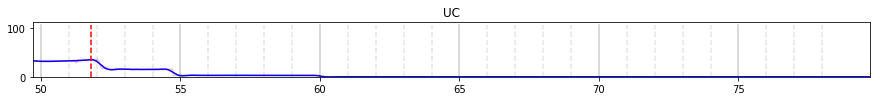

@51.13m : variable
                    23.7 bpm   dur:  45s (0.8min)   mag:  80.3 bpm   valid: 69%
                    tOnset:  25s   tRelease:  20s   span: 50.72 - 51.47 min
@53.02m : variable
                    15.9 bpm   dur:  34s (0.6min)   mag:  87.7 bpm   valid: 71%
                    tOnset:  15s   tRelease:  19s   span: 52.77 - 53.33 min
@54.73m : acceleration
                    35.1 bpm   dur:  18s (0.3min)   mag: 141.8 bpm   valid: 89%
                    tOnset:  13s   tRelease:   5s   span: 54.52 - 54.82 min
@55.65m : acceleration
                    43.1 bpm   dur:  23s (0.4min)   mag: 155.8 bpm   valid: 87%
                    tOnset:  10s   tRelease:  13s   span: 55.48 - 55.87 min
@59.40m : acceleration
                    24.7 bpm   dur:  36s (0.6min)   mag: 129.5 bpm   valid: 89%
                    tOnset:  10s   tRelease:  26s   span: 59.23 - 59.83 min

----------


****************************************


****************************************



In [12]:
#for recno in ['1011', '1014', '1016', '1020']:
#for recno in ['1011']:
#for recno in ['1002']:
#for recno in ['2024', '1011']:
#for recno in range(1001, 1031):
#for recno in range(1001, 1011):
for recno in selectedRecordings:
    src = str(recno)
    fhr, mask, ts, uc, filtUC = loadPhysionetRecording(src, recordPrefix=BASE_ctu_uhb_ctgdb)
    # Extract contraction events from UC signal
    allUC = physionetExtractUC(filtUC, ts)
    displayRecordingAll(fhr, mask, ts, uc, filtUC, allUC=allUC, name=src, 
                        allExtractorParams=FEATURE_EXTRACT_PARAMS,
                        showIndividualDecels=False, showAltBaselines=True,
                        showVariability=True,
                        showBorderline=False)
    print
    print '*'*40
    print